### 1. Import libraries

In [42]:
import numpy as np
import pandas as pd
from time import time
import seaborn as sns
import matplotlib.pyplot as plt
#Normalization
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [43]:
df = pd.read_csv("measurements.csv")

### 2. Learning about the new Data

In [44]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB
None


In [46]:
print(df.describe().T)

              count       mean        std   min    25%   50%   75%   max
speed         388.0  41.927835  13.598524  14.0  32.75  40.5  50.0  90.0
temp_outside  388.0  11.358247   6.991542  -5.0   7.00  10.0  16.0  31.0
AC            388.0   0.077320   0.267443   0.0   0.00   0.0   0.0   1.0
rain          388.0   0.123711   0.329677   0.0   0.00   0.0   0.0   1.0
sun           388.0   0.082474   0.275441   0.0   0.00   0.0   0.0   1.0


#### 2.1 Converting columns to their correct data type

In [47]:
#Type Conversion for Numerical Data
df['distance'] = df['distance'].str.replace(',','.').astype('float32')
df['consume'] = df['consume'].str.replace(',','.').astype('float32')
df['temp_inside'] = df['temp_inside'].str.replace(',','.').astype('float32')
df['refill liters'] = df['refill liters'].str.replace(',','.').astype('float32')
df['specials'] = df['specials'].str.lower()

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   distance       388 non-null    float32
 1   consume        388 non-null    float32
 2   speed          388 non-null    int64  
 3   temp_inside    376 non-null    float32
 4   temp_outside   388 non-null    int64  
 5   specials       93 non-null     object 
 6   gas_type       388 non-null    object 
 7   AC             388 non-null    int64  
 8   rain           388 non-null    int64  
 9   sun            388 non-null    int64  
 10  refill liters  13 non-null     float32
 11  refill gas     13 non-null     object 
dtypes: float32(4), int64(5), object(3)
memory usage: 30.4+ KB
None


#### 2.2 CLeaning dataset from null & missing values

In [49]:
print(df.isna().sum())

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64


In [50]:
df['specials'] = df['specials'].fillna('others')
# df = df.drop(['specials'], axis=1)
df = df.drop(['refill liters'], axis=1)
df = df.drop(['refill gas'], axis=1)

df['temp_inside'] = df['temp_inside'].fillna(df['temp_inside'].mean())

I have decided to drop both refill columns as it can be a problem to have too many null values, it adds no value to the study

In [51]:
print(df.isna().sum())

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
specials        0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64


In [52]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,others,E10,0,0,0
1,12.0,4.2,30,21.5,13,others,E10,0,0,0
2,11.2,5.5,38,21.5,15,others,E10,0,0,0
3,12.9,3.9,36,21.5,14,others,E10,0,0,0
4,18.5,4.5,46,21.5,15,others,E10,0,0,0
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,others,SP98,0,0,0
384,16.1,4.3,38,25.0,31,ac,SP98,1,0,0
385,16.0,3.8,45,25.0,19,others,SP98,0,0,0
386,15.4,4.6,42,25.0,31,ac,SP98,1,0,0


#### 2.3. Data Visualization

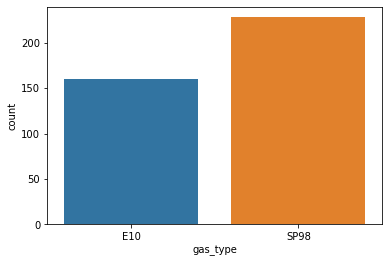

In [53]:
sns.countplot(data = df, x = "gas_type")
plt.show()

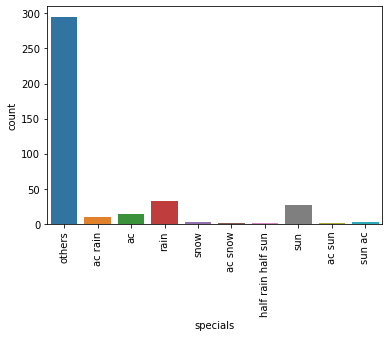

In [54]:
sns.countplot(data = df, x = "specials")
plt.xticks(rotation=90)
plt.show()

In [55]:
# sns.pairplot(data = df[["distance", "consume", "speed", "temp_inside", "temp_outside", "specials"]], hue="specials")
# plt.show()

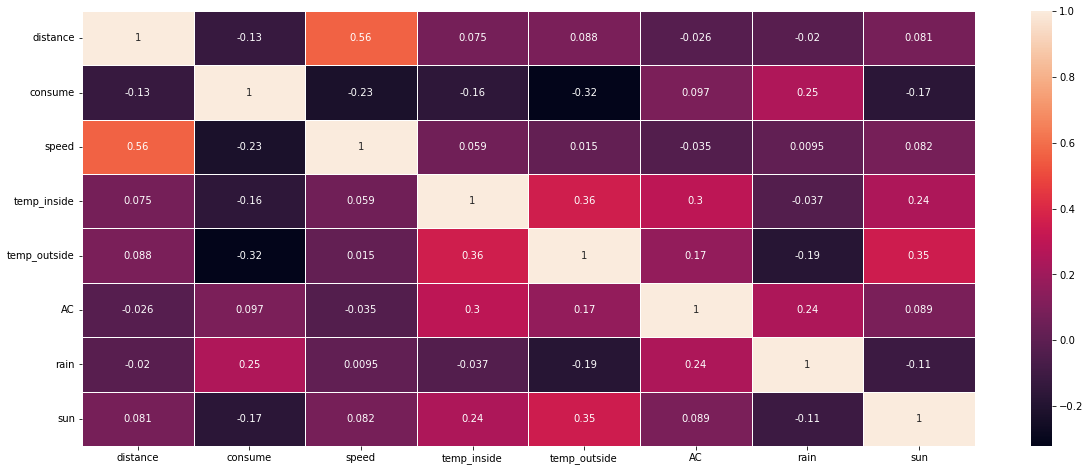

In [56]:
fig, ax = plt.subplots(figsize=(20,8))
sns.heatmap(df.corr(), linewidths=.5, annot=True, ax = ax)
plt.show()

### 3. Encoding data

In [57]:
corr_index = df.corr()['consume'].abs().sort_values(ascending=False)[1:11].index
print(corr_index)

Index(['temp_outside', 'rain', 'speed', 'sun', 'temp_inside', 'distance',
       'AC'],
      dtype='object')


In [58]:
X = df.drop(['consume'], axis = 1)[corr_index]
y = df['consume']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)

X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [61]:
from sklearn.preprocessing import MinMaxScaler
def EscaladorMinMax(data, MinMaxtransformer):
    X_normalized = MinMaxtransformer.transform(data)
    print(X_normalized.shape)
    X_normalized = pd.DataFrame(X_normalized,columns=data.columns)
    return X_normalized

In [62]:
MinMaxtransformer = MinMaxScaler().fit(X_train_num) # Only run once
# Ahora habría que llamar a la función

In [63]:
X_train_num_scaled = EscaladorMinMax(X_train_num, MinMaxtransformer)
X_test_num_scaled = EscaladorMinMax(X_test_num, MinMaxtransformer)

(310, 7)
(78, 7)


In [64]:
X_train_num_scaled

,temp_outside,rain,speed,sun,temp_inside,distance,AC
0,0.305556,0.0,0.157895,0.0,0.384615,0.025605,0.0
1,0.194444,0.0,0.342105,0.0,0.538462,0.048883,0.0
2,0.305556,0.0,0.250000,0.0,0.384615,0.068901,0.0
3,0.361111,1.0,0.750000,0.0,0.307692,0.115922,1.0
4,0.611111,0.0,0.421053,0.0,0.461538,0.068436,0.0
...,...,...,...,...,...,...,...
305,0.416667,0.0,0.078947,0.0,0.384615,0.003259,0.0
306,0.166667,0.0,0.802632,0.0,0.615385,0.751397,0.0
307,0.472222,0.0,0.355263,0.0,0.461538,0.068436,0.0
308,0.833333,0.0,0.473684,0.0,0.461538,0.071229,0.0
